In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import warnings
import yaml
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
import pandas as pd
import evolution
warnings.filterwarnings('ignore')

cm_tokyo = np.loadtxt("ColorMaps/tokyo/tokyo.txt")
tokyo = LinearSegmentedColormap.from_list("tokyo", cm_tokyo)
cm_batlow = np.loadtxt("ColorMaps/batlow/batlow.txt")
batlow = LinearSegmentedColormap.from_list("batlow", cm_batlow)
cm_lajolla = np.loadtxt("ColorMaps/lajolla/lajolla.txt")
lajolla = LinearSegmentedColormap.from_list("lajolla", cm_lajolla)
cm_oslo = np.loadtxt("ColorMaps/oslo/oslo.txt")
oslo = LinearSegmentedColormap.from_list("oslo", cm_oslo)
cm_davos = np.loadtxt("ColorMaps/davos/davos.txt")
davos = LinearSegmentedColormap.from_list("davos", cm_davos)
cm_bamako = np.loadtxt("ColorMaps/bamako/bamako.txt")
bamako = LinearSegmentedColormap.from_list("bamako", cm_bamako)
cm_nuuk = np.loadtxt("ColorMaps/nuuk/nuuk.txt")
nuuk = LinearSegmentedColormap.from_list("nuuk", cm_nuuk)
cm_bilbao = np.loadtxt("ColorMaps/bilbao/bilbao.txt")
bilbao = LinearSegmentedColormap.from_list("bilbao", cm_bilbao)
plots_folder = "./Figures/"

In [3]:
def reverse_colourmap(cmap, name = 'my_cmap_r'):        
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

tokyo_r = reverse_colourmap(tokyo)
batlow_r = reverse_colourmap(batlow)
lajolla_r = reverse_colourmap(lajolla)
oslo_r = reverse_colourmap(oslo)
bamako_r = reverse_colourmap(bamako)
bilbao_r = reverse_colourmap(bilbao)

In [4]:
Mp  = 1.0
XFe = 35.
FeM = 10.
S = 0.11

Planet = evolution.Rocky_Planet(Mp, XFe, FeM, S)

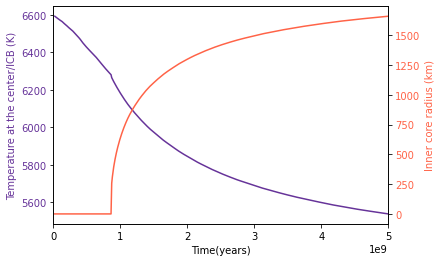

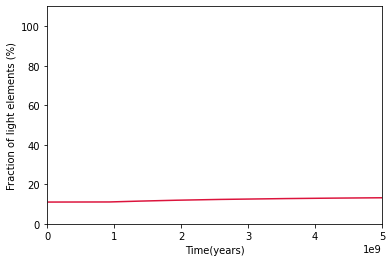

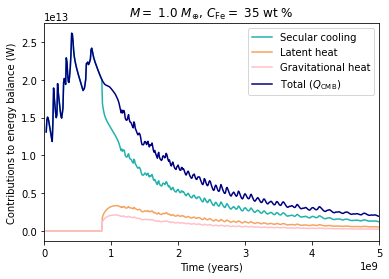

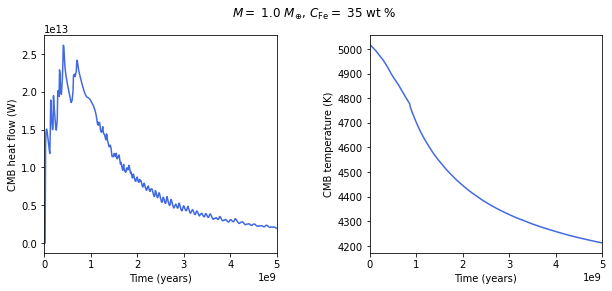

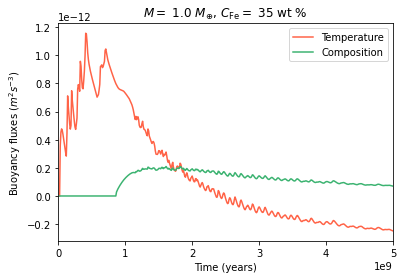

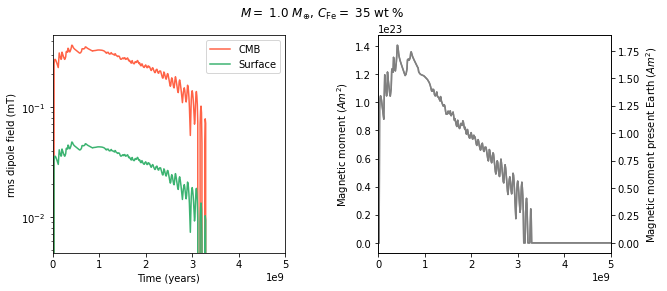

In [5]:
evo = evolution.Evolution(Planet)
evo.run()
evo.plot(plots_folder)

In [18]:
# If inner core, dT_dt should be smaller as we also have latent heat --> Lena is using a larger one, meaning that her interior is losing more heat
# than what it should be --> her Q_CMB should be lower.

# REVISION: Our T is larger than what Lena has --> this means we should be using a larger Q_CMB (Lena is using a smaller one)
# What happens if we add Q_ICB? T should be even larger!!

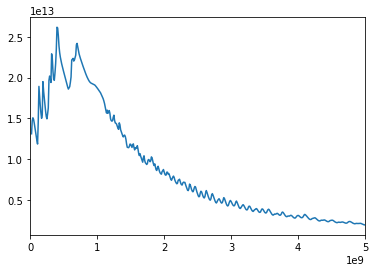

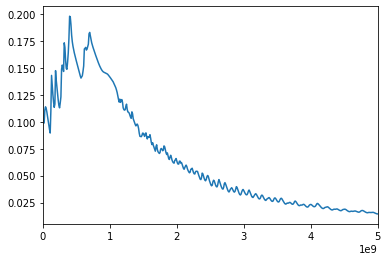

1.5427515446220017


In [20]:
qcmb_ev = pd.read_csv("./Q_CMB/res_t_HS_Tm_Tb_qs_qc_M{:02d}_Fe{:02d}_#FeM{:02d}.res".format(int(10*Mp),int(XFe), int(FeM)), skipinitialspace=True, sep=" ", index_col=False,skiprows=[0])
qcmb_ev.columns = ["time", "H_rad", "T_um","T_cmb","q_surf","qcmb"]
time_vector = qcmb_ev["time"] *1e6
qcmb = qcmb_ev["qcmb"]

plt.plot(time_vector,qcmb*evo.planet.r_OC**2 * 4 * np.pi)
plt.xlim([0,5e9])
plt.show()

plt.plot(time_vector,qcmb)
plt.xlim([0,5e9])
plt.show()

print ((0.013326 * 4* np.pi *(3035240.8493732996)**2)*1e-12)

## Run cases for all Mp, all XFe, and a set amount of FeM (LE=0)

In [5]:
Masses = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2.]
Fe = [15,20,25,30,35,40,45,50,55,60,65,70,75,80]
Fe_mantle = [0.00,10.,20.]
S = 0.0

M, F = np.meshgrid(Masses, Fe)
r_IC_end = np.zeros((len(Fe),len(Masses)*len(Fe_mantle)))
r_IC_beginning = np.zeros_like(r_IC_end)
MF_lifetime = np.zeros_like(r_IC_end)
MF_strength = np.zeros_like(r_IC_end)
tIC_80 = np.zeros_like(r_IC_end)
Q_CMB_end = np.zeros_like(r_IC_end)
r_OC = np.zeros_like(r_IC_end)

for m,iron_mantle in enumerate(Fe_mantle):
    for i, mass in enumerate(Masses):
        for j,iron in enumerate(Fe):
            Mp = mass
            XFe = iron
            FeM = iron_mantle
            S = S
            print (Mp,XFe,FeM,S)
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)

            evo.run()
            #evo.plot(plots_folder)
            
            r_IC_beginning[j,i+m*len(Masses)] = evo.planet.r_IC_0/1e3 
            r_IC_end[j,i+m*len(Masses)] = evo.r_IC[-1]/1e3      
            r_OC[j,i+m*len(Masses)] = evo.planet.r_OC/1e3
            MF_lifetime[j,i+m*len(Masses)] = evo.t_mf
            tIC_80[j,i+m*len(Masses)] = evo.t_80/1e9
            Q_CMB_end[j,i+m*len(Masses)] = evo.Q_CMB[-1]  
            MF_strength[j,i+m*len(Masses)] = np.max(evo.M_ratio)

0.8 15 0.0 0.0
0.8 20 0.0 0.0
0.8 25 0.0 0.0
0.8 30 0.0 0.0
0.8 35 0.0 0.0
0.8 40 0.0 0.0
0.8 45 0.0 0.0
0.8 50 0.0 0.0
0.8 55 0.0 0.0
0.8 60 0.0 0.0
0.8 65 0.0 0.0
0.8 70 0.0 0.0
0.8 75 0.0 0.0
0.8 80 0.0 0.0
0.9 15 0.0 0.0
0.9 20 0.0 0.0
0.9 25 0.0 0.0
0.9 30 0.0 0.0
0.9 35 0.0 0.0
0.9 40 0.0 0.0
0.9 45 0.0 0.0
0.9 50 0.0 0.0
0.9 55 0.0 0.0
0.9 60 0.0 0.0
0.9 65 0.0 0.0
0.9 70 0.0 0.0
0.9 75 0.0 0.0
0.9 80 0.0 0.0
1.0 15 0.0 0.0
1.0 20 0.0 0.0
1.0 25 0.0 0.0
1.0 30 0.0 0.0
1.0 35 0.0 0.0
1.0 40 0.0 0.0
1.0 45 0.0 0.0
1.0 50 0.0 0.0
1.0 55 0.0 0.0
1.0 60 0.0 0.0
1.0 65 0.0 0.0
1.0 70 0.0 0.0
1.0 75 0.0 0.0
1.0 80 0.0 0.0
1.1 15 0.0 0.0
1.1 20 0.0 0.0
1.1 25 0.0 0.0
1.1 30 0.0 0.0
1.1 35 0.0 0.0
1.1 40 0.0 0.0
1.1 45 0.0 0.0
1.1 50 0.0 0.0
1.1 55 0.0 0.0
1.1 60 0.0 0.0
1.1 65 0.0 0.0
1.1 70 0.0 0.0
1.1 75 0.0 0.0
1.1 80 0.0 0.0
1.2 15 0.0 0.0
1.2 20 0.0 0.0
1.2 25 0.0 0.0
1.2 30 0.0 0.0
1.2 35 0.0 0.0
1.2 40 0.0 0.0
1.2 45 0.0 0.0
1.2 50 0.0 0.0
1.2 55 0.0 0.0
1.2 60 0.0 0.0
1.2 65 0.0

In [32]:
levels_rIC = np.linspace(0, 5500, 12)
levels_ICMF = np.linspace(0, 1, 11)
levels_MF = np.linspace(0, 5, 6)
levels_S = np.logspace(0,2,22)
levels_S = np.linspace(0,45,6)
levels_rIC08 = np.linspace(0,5,6)
levels_MFstr = np.linspace(0,9,10)
print (levels_MFstr)
size = 13

def plot_contourf(X,Y,arr,Masses,Fe,Fe_mantle,levels,plots_folder,colormap=plt.cm.magma,clabel="ICB radius (km)",figname="r_IC_FeM.pdf"):
    fig, ax = plt.subplots(1, len(Fe_mantle), figsize=[16,4],sharey=True,sharex=True)
    plt.subplots_adjust(wspace = 0.2)
    
    for i in range(len(Fe_mantle)):
        sc = ax[i].contourf(X,Y,arr[:,i*len(Masses):len(Masses)*(i+1)],levels, cmap = colormap)  
        for a in range(len(Masses)):
            for b in range(len(Fe)):
                ax[i].scatter(Masses[a],Fe[b],s=size,color='white',edgecolors='k')
        if i!=0:
            ax[i].set_ylabel("")
        else:
            ax[i].set_ylabel("Fe content (wt.%)")
        #if len(S) ==1:
        ax[i].set_title('#$Fe_M$={}'.format(Fe_mantle[i]*1e-2))
        #else:
        #    ax[i].set_title('LE={}%'.format(Fe_mantle[i]*1e2))
        ax[i].yaxis.set_ticks_position('both')
        ax[i].set_xlabel("Planetary mass ($M_{p}/M_{Earth}$)")
        ax[i].set_xlim([0.8,2.0])
        ax[i].set_ylim([15,80])
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
    cb = fig.colorbar(sc, cax=cbar_ax)
    cb.set_label(clabel)
    plt.savefig(plots_folder + figname, bbox_inches="tight")
    plt.show()
    
def plot_contourfM(X,Y,arr,Masses,Fe,yl,levels,plots_folder,Ylabel = "#$Fe_{M}$",clabel="ICB radius (km)",figname="r_IC_FeM.pdf"):
    fig, ax = plt.subplots(1, len(Masses), figsize=[16,3],sharey=True,sharex=True)
    plt.subplots_adjust(wspace = 0.2)

    levels_rIC = np.linspace(0, 5500, 12)
    for i in range(len(Masses)):
        sc = ax[i].contourf(X,Y,arr[:,i*len(Fe):len(Fe)*(i+1)],levels, cmap = plt.cm.magma)  
        for a in range(len(Fe)):
            for b in range(len(yl)):
                ax[i].scatter(Fe[a],yl[b],s=size,color='white',edgecolors='k')
        if i!=0:
            ax[i].set_ylabel("")
        else:
            ax[i].set_ylabel(Ylabel)
        ax[i].set_title("{:.1f}".format(Masses_[i]) + r" $M_{Earth}$")
        ax[i].yaxis.set_ticks_position('both')
        ax[i].set_xlabel("Fe content (wt.%)")
        ax[i].yaxis.set_ticks_position('both')
        ax[i].set_xlim([15,75])
        if Ylabel == "LE":
            ax[i].set_ylim([0,0.1])
        else:
            ax[i].set_ylim([0,20])
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
    cb = fig.colorbar(sc, cax=cbar_ax)
    cb.set_label(clabel)
    plt.savefig(plots_folder + figname, bbox_inches="tight")
    plt.show()

colors = ["coral","crimson","darkmagenta"]
#ls = ["-",":"]
ls = ["-","-"]
label_mass = ["1 $M_{Earth}$","1.5 $M_{Earth}$","2 $M_{Earth}$"]

def plot_evolution(nplot,Masses,Fe,arr,yl,figsize=[10,4],leg=(0.98, 0.98),yltop=[3,3],ylbot=[3,3],figname = "Evo_TICB_rICBFUNC.pdf"):
    fig, ax = plt.subplots(1, nplot,figsize=figsize,sharex=True)
    for b in range(nplot):
        for i, mass in enumerate(Masses):
            for j,iron in enumerate(Fe):
                if nplot ==1:
                    ax.plot(time[:,i+j*len(Masses)]/1e9,arr[:,i+j*len(Masses)],color=colors[j],linestyle=ls[j])
                    ax.set_ylabel(yl)
                    ax.set_xlabel('Time (Gyr)')
                    ax.set_xlim([0,5])
                    if j==0:
                        ax.plot(time[:,i+j*len(Masses)]/1e9,arr[:,i+j*len(Masses)],color=colors[j],linestyle=ls[j],label=label_mass[i])                   
                else:    
                    arr_plot = arr[b]
                    ax[b].plot(time[:,i+j*len(Masses)]/1e9,arr_plot[:,i+j*len(Masses)],color=colors[j],linestyle=ls[j])
                    ax[b].set_ylabel(yl[b])
                    ax[b].set_xlabel('Time (Gyr)')
                    ax[b].set_xlim([0,5])
                    ax[b].set_ylim(bottom=ylbot[b],top=yltop[b])
                    if j==0 and b==nplot-1:
                        arr_plot = arr[b]
                        ax[b].plot(time[:,i+j*len(Masses)]/1e9,arr_plot[:,i+j*len(Masses)],color=colors[j],linestyle=ls[j],label=label_mass[i])
                if yl == ["ICB temperature (K)","Inner core radius (km)"]:# and arr[1][0]==0.:
                    ax[1].scatter(t_IC0[i]/1e9,0,s=30,color='lightseagreen',marker='*')
                    ax[0].scatter(t_IC0[i]/1e9,T_IC0[i],s=30,color='lightseagreen',marker='*')
                if yl == ["CMB heat flow (TW)","CMB temperature (K)"] and Fe==[0,10]:
                    ax[1].scatter(t_IC0[i]/1e9,T_CMB0[i],s=30,color='lightseagreen',marker='*')
    display = (0,1,2,3,4)
    XFe_noic = plt.Line2D((0,1),(0,0), color='k')
    XFe_ic = plt.Line2D((0,1),(0,0), color='k',marker='',linestyle=':')
    if nplot>1:
        ax1 = ax[nplot-1]
        plt.subplots_adjust(wspace = 0.3)
    else:
        ax1 = plt.gca()
    #handles, labels = ax1.get_legend_handles_labels()
    #ax1.legend([handle for i,handle in enumerate(handles) if i in display]+[XFe_noic,XFe_ic],
    #    [label for i,label in enumerate(labels) if i in display]+['$X_{Fe}$=25','$X_{Fe}$=55'],bbox_to_anchor=leg,borderaxespad=0.,fontsize=8) 
    if yl=="Magnetic moment ($A m^{2}$)":
        ax2 = ax1.twinx()  
        ax2.set_ylabel('Magnetic moment present Earth ($A m^{2}$)')  
        ax2.set_ylim([0,3])
    plt.savefig(plots_folder + figname, bbox_inches="tight")
    plt.show() 

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


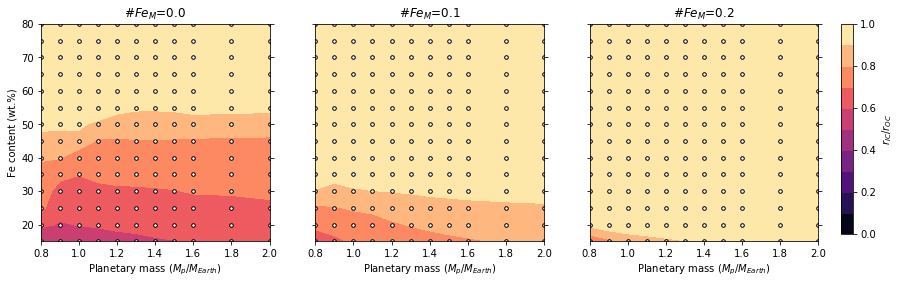

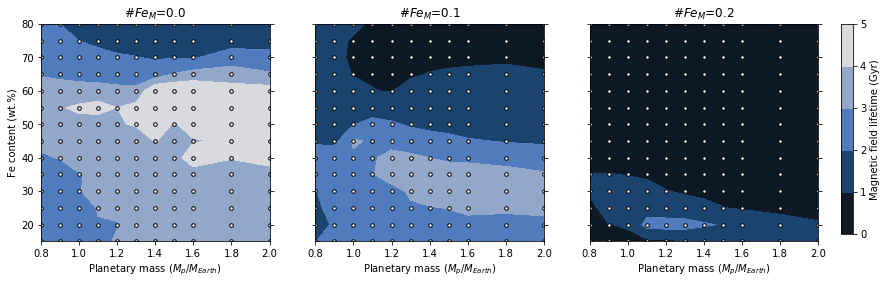

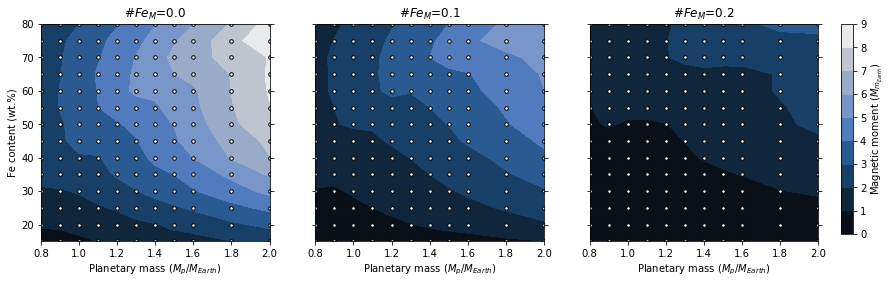

In [20]:
#plot_contourf(M,F,r_IC_beginning,Masses,Fe,Fe_mantle,levels_rIC,plots_folder,colormap=plt.cm.magma,clabel="ICB radius (km)",figname="r_IC0_FeM.pdf")
#plot_contourf(M,F,r_IC_beginning/r_OC,Masses,Fe,Fe_mantle,levels_ICMF,plots_folder,colormap=plt.cm.magma,clabel="$r_{IC_{0}}$/$r_{OC}$",figname="ICMF0_FeM.pdf")

#plot_contourf(M,F,r_IC_end,Masses,Fe,Fe_mantle,levels_rIC,plots_folder,colormap=plt.cm.magma,clabel="ICB radius (km)",figname="r_IC_FeM.pdf")
plot_contourf(M,F,r_IC_end/r_OC,Masses,Fe,Fe_mantle,levels_ICMF,plots_folder,colormap=plt.cm.magma,clabel="$r_{IC}$/$r_{OC}$",figname="ICMF_FeM.pdf")

plot_contourf(M,F,MF_lifetime,Masses,Fe,Fe_mantle,levels_MF,plots_folder,colormap=oslo,clabel="Magnetic field lifetime (Gyr)",figname="MF_lifetime_FeM_newrho.pdf")

#plot_contourf(M,F,tIC_80,Masses,Fe,Fe_mantle,levels_rIC08,plots_folder,colormap=oslo,clabel="Time to reach 80% OC (Gyr)",figname="t80_FeM.pdf")

plot_contourf(M,F,MF_strength,Masses,Fe,Fe_mantle,levels_MFstr,plots_folder,colormap=oslo,clabel="Magnetic moment ($M_{m_{Earth}}$)",figname="MM_newrho.pdf")

## Plot time to reach 80% outer core

In [73]:
Masses = [0.8,1.0,1.5,2.]
Fe_mantle = [20.]
if Fe_mantle==[10.]:
    Fe = [30,35,40,45,50,55,60,65,70,75,80]
elif Fe_mantle==[0.00]:
    Fe = [50,55,60,65,70,75,80]
else:
    Fe = [15,20,25,30,35,40,45,50,55,60,65,70,75,80]
S = 0.0

M, F = np.meshgrid(Masses, Fe)
r_IC_end = np.zeros((len(Fe),len(Masses)*len(Fe_mantle)))
tIC_80 = np.zeros_like(r_IC_end)
r_OC = np.zeros_like(r_IC_end)

for m,iron_mantle in enumerate(Fe_mantle):
    for i, mass in enumerate(Masses):
        for j,iron in enumerate(Fe):
            Mp = mass
            XFe = iron
            FeM = iron_mantle
            S = S
            print (Mp,XFe,FeM,S)
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)

            evo.run()
            
            r_IC_end[j,i+m*len(Masses)] = evo.r_IC[-1]/1e3      
            r_OC[j,i+m*len(Masses)] = evo.planet.r_OC/1e3
            tIC_80[j,i+m*len(Masses)] = evo.t_80/1e9

0.8 15 20.0 0.0
0.0
0.8 20 20.0 0.0
1600040000.0
0.8 25 20.0 0.0
290022999.99999994
0.8 30 20.0 0.0
30023000.000000004
0.8 35 20.0 0.0
30023000.000000004
0.8 40 20.0 0.0
30111200.0
0.8 45 20.0 0.0
30135000.0
0.8 50 20.0 0.0
30007700.0
0.8 55 20.0 0.0
30040900.0
0.8 60 20.0 0.0
30024100.0
0.8 65 20.0 0.0
30050400.0
0.8 70 20.0 0.0
30023000.000000004
0.8 75 20.0 0.0
30101000.0
0.8 80 20.0 0.0
30055500.0
1.0 15 20.0 0.0
4210090000.0
1.0 20 20.0 0.0
1160000000.0
1.0 25 20.0 0.0
110023000.0
1.0 30 20.0 0.0
30023000.000000004
1.0 35 20.0 0.0
30023000.000000004
1.0 40 20.0 0.0
30023000.000000004
1.0 45 20.0 0.0
30023000.000000004
1.0 50 20.0 0.0
30023000.000000004
1.0 55 20.0 0.0
30064900.0
1.0 60 20.0 0.0
30040900.0
1.0 65 20.0 0.0
30005000.0
1.0 70 20.0 0.0
30165900.0
1.0 75 20.0 0.0
30030700.0
1.0 80 20.0 0.0
30112900.0
1.5 15 20.0 0.0
2250050000.0
1.5 20 20.0 0.0
410011999.99999994
1.5 25 20.0 0.0
30023000.000000004
1.5 30 20.0 0.0
30023000.000000004
1.5 35 20.0 0.0
30023000.000000004
1.5

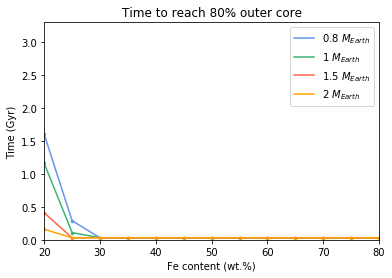

In [75]:
labels = ["0.8 $M_{Earth}$","1 $M_{Earth}$","1.5 $M_{Earth}$","2 $M_{Earth}$"]
colors = ["cornflowerblue","mediumseagreen","tomato","orange"]
plt.figure()
for i in range(len(Masses)):
    plt.plot(F[:,i],tIC_80[:,i],label=labels[i],color=colors[i])
    plt.scatter(F[:,i],tIC_80[:,i],color=colors[i],s=6)
plt.legend()
plt.xlabel('Fe content (wt.%)')
plt.ylabel('Time (Gyr)')
plt.title('Time to reach 80% outer core')
plt.xlim([20,80])
plt.ylim([0,3.3])
plt.savefig(plots_folder+"80%core.pdf")
plt.show()

## Evolutions for planets of different mass and FeM (FeM=0 and FeM=10)

In [6]:
colors = ["coral","crimson","darkmagenta"]
ls = ["-",":"]
label_mass = ["1 $M_{Earth}$","1.5 $M_{Earth}$","2 $M_{Earth}$"]

def plot_evolution(nplot,Masses,Fe,arr,yl,figsize=[10,4],leg=(0.98, 0.98),figname = "Evo_TICB_rICBFUNC.pdf"):
    fig, ax = plt.subplots(1, nplot,figsize=figsize,sharex=True)
    for b in range(nplot):
        for i, mass in enumerate(Masses):
            for j,iron in enumerate(Fe):
                if nplot ==1:
                    ax.plot(time[:,i+j*len(Masses)]/1e9,arr[:,i+j*len(Masses)],color=colors[i],linestyle=ls[j])
                    ax.set_ylabel(yl)
                    ax.set_xlabel('Time (Gyr)')
                    ax.set_xlim([0,5])
                    if j==0:
                        ax.plot(time[:,i+j*len(Masses)]/1e9,arr[:,i+j*len(Masses)],color=colors[i],linestyle=ls[j],label=label_mass[i])                   
                else:    
                    arr_plot = arr[b]
                    ax[b].plot(time[:,i+j*len(Masses)]/1e9,arr_plot[:,i+j*len(Masses)],color=colors[i],linestyle=ls[j])
                    ax[b].set_ylabel(yl[b])
                    ax[b].set_xlabel('Time (Gyr)')
                    ax[b].set_xlim([0,5])
                    if j==0 and b==nplot-1:
                        arr_plot = arr[b]
                        ax[b].plot(time[:,i+j*len(Masses)]/1e9,arr_plot[:,i+j*len(Masses)],color=colors[i],linestyle=ls[j],label=label_mass[i])
                if yl == ["ICB temperature (K)","Inner core radius (km)"]:
                    ax[1].scatter(t_IC0[i]/1e9,0,s=30,color=colors[i],marker='*')
                    ax[0].scatter(t_IC0[i]/1e9,T_IC0[i],s=30,color=colors[i],marker='*')
    display = (0,1,2,3,4)
    XFe_noic = plt.Line2D((0,1),(0,0), color='k')
    XFe_ic = plt.Line2D((0,1),(0,0), color='k',marker='',linestyle=':')
    if nplot>1:
        ax1 = ax[nplot-1]
        plt.subplots_adjust(wspace = 0.3)
    else:
        ax1 = plt.gca()
#     handles, labels = ax1.get_legend_handles_labels()
#     ax1.legend([handle for i,handle in enumerate(handles) if i in display]+[XFe_noic,XFe_ic],
#         [label for i,label in enumerate(labels) if i in display]+['$X_{Fe}$=25','$X_{Fe}$=55'],bbox_to_anchor=leg,borderaxespad=0.,fontsize=8) 
#     if yl=="Magnetic moment ($A m^{2}$)":
#         ax2 = ax1.twinx()  
#         ax2.set_ylabel('Magnetic moment present Earth ($A m^{2}$)')  
#         ax2.set_ylim([0,3])
    plt.savefig(plots_folder + figname, bbox_inches="tight")
    plt.show() 

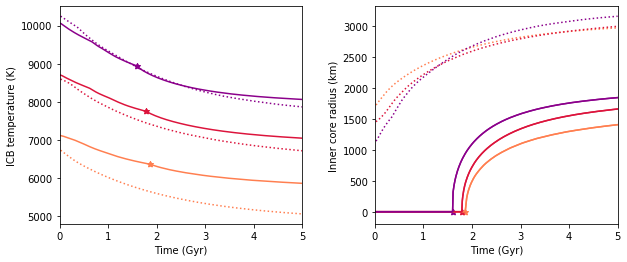

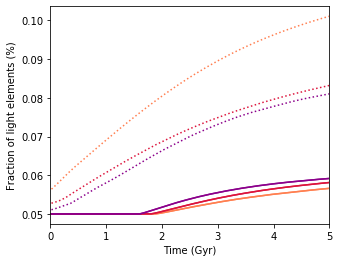

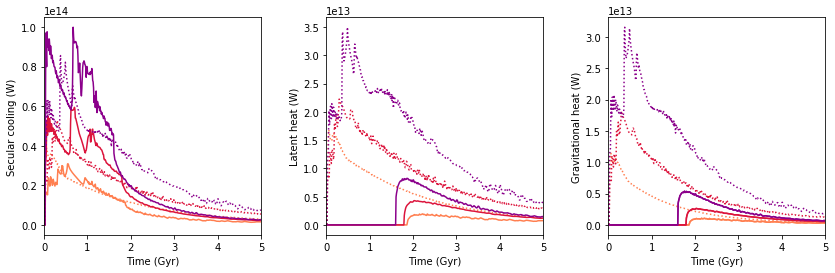

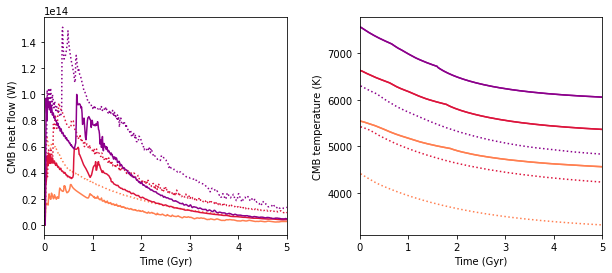

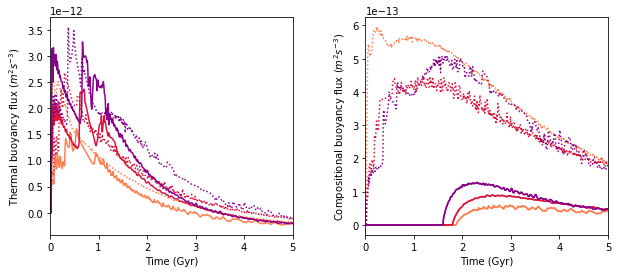

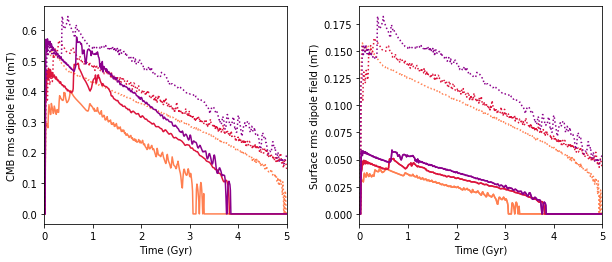

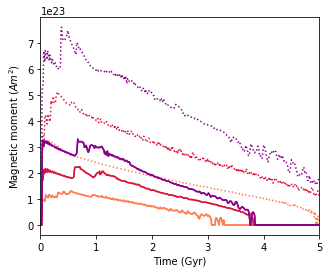

In [7]:
Masses = [1.,1.5,2.]
Fe = [25.,55.]
Fe_mantle = 0.
S=0.05

T_ICB = np.zeros((499,len(Fe)*len(Masses)),dtype=np.float64)
time = np.zeros_like(T_ICB)
r_ICB = np.zeros_like(T_ICB)
QC = np.zeros_like(T_ICB)
QL = np.zeros_like(T_ICB)
QX = np.zeros_like(T_ICB)
Q_CMB = np.zeros_like(T_ICB)
T_CMB = np.zeros_like(T_ICB)
F_th = np.zeros_like(T_ICB)
F_X = np.zeros_like(T_ICB)
Bc = np.zeros_like(T_ICB)
Bs = np.zeros_like(T_ICB)
M = np.zeros_like(T_ICB)
M_ratio = np.zeros_like(T_ICB)
S_t = np.zeros_like(T_ICB)
t_IC0 = np.zeros((len(Fe)*len(Masses),1),dtype=np.float64)
T_IC0 = np.zeros_like(t_IC0)

for i, mass in enumerate(Masses):
    for j,iron in enumerate(Fe):
        Mp = mass
        XFe = iron
        FeM = Fe_mantle
        
        Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
        evo = evolution.Evolution(Planet)
        evo.run()
            
        T_ICB[:,i+j*len(Masses)] = evo.T
        r_ICB[:,i+j*len(Masses)] = evo.r_IC
        QC[:,i+j*len(Masses)] = evo.QC
        QL[:,i+j*len(Masses)] = evo.QL
        QX[:,i+j*len(Masses)] = evo.QX
        Q_CMB[:,i+j*len(Masses)] = evo.Q_CMB
        T_CMB[:,i+j*len(Masses)] = evo.T_CMB
        F_th[:,i+j*len(Masses)] = evo.F_th
        F_X[:,i+j*len(Masses)] = evo.F_X
        Bc[:,i+j*len(Masses)] = evo.Bc
        Bs[:,i+j*len(Masses)] = evo.Bs
        M[:,i+j*len(Masses)] = evo.M
        M_ratio[:,i+j*len(Masses)] = evo.M_ratio
        S_t[:,i+j*len(Masses)] = evo.S_t
        if r_ICB[0,i+j*len(Masses)] ==0:
            t_IC0[i] = evo.t_IC0
            T_IC0[i] = evo.T_IC0
        time[:,i+j*len(Masses)] = evo.planet.time_vector

# Plot r_ICB and T_ICB
yl = ["ICB temperature (K)","Inner core radius (km)"]
arr = [T_ICB,r_ICB/1e3]
plot_evolution(2,Masses,Fe,arr,yl,figsize=[10,4],leg=(1.04, 1.),figname = "Evo_TICB_rICBFUNC.pdf")

# Plot evolution of light elements
if S!=0.:
    plot_evolution(1,Masses,Fe,S_t,yl="Fraction of light elements (%)",figsize=[5,4],leg=(1.04, 1.),figname = "Evo_SFUNC.pdf")

# Plot energy budgets
yl = ["Secular cooling (W)","Latent heat (W)","Gravitational heat (W)"]
arr = [QC,QL,QX]
plot_evolution(3,Masses,Fe,arr,yl,figsize=[14,4],leg = (1.35, 1.),figname = "Evo_EnergyFUNC.pdf")

# T_CMB and Q_CMB
yl = ["CMB heat flow (W)","CMB temperature (K)"]
arr = [Q_CMB,T_CMB]
plot_evolution(2,Masses,Fe,arr,yl,figsize=[10,4],leg = (1.04, 1.),figname = "Evo_QCMB_TCMBFUNC.pdf")

# Plot buoyancy fluxes
yl = ["Thermal buoyancy flux ($m^{2}s^{-3}$)","Compositional buoyancy flux ($m^{2}s^{-3}$)"]
arr = [F_th,F_X]
plot_evolution(2,Masses,Fe,arr,yl,figsize=[10,4],leg = (1.32, 1.),figname = "Evo_FluxesFUNC.pdf")

# Plot rms dipole field at the surface and at the CMB
yl = ["CMB rms dipole field (mT)","Surface rms dipole field (mT)"]
arr = [Bc*1e3,Bs*1e3]
plot_evolution(2,Masses,Fe,arr,yl,figsize=[10,4],leg = (1.32, 1.),figname = "Evo_rmsFUNC.pdf")

# Plot magnetic moment evolution
plot_evolution(1,Masses,Fe,M,yl="Magnetic moment ($A m^{2}$)",figsize=[5,4],leg=(0.98, 0.98),figname = "Evo_MFFUNC.pdf")

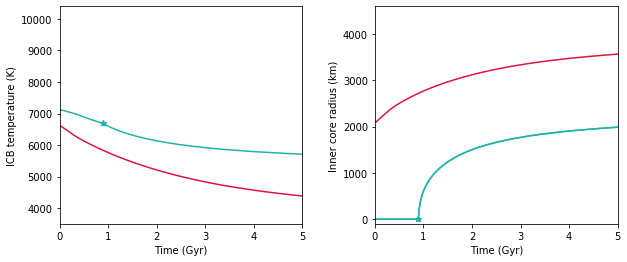

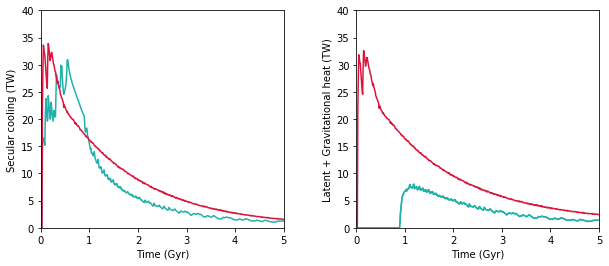

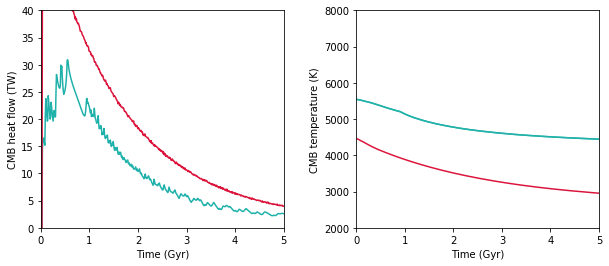

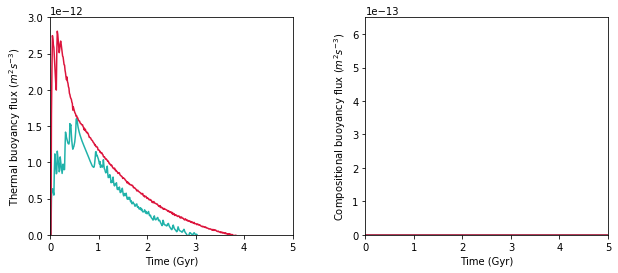

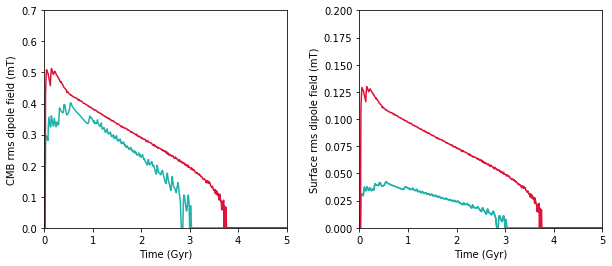

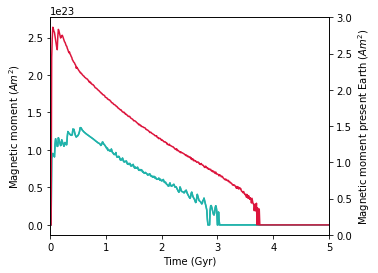

In [34]:
Masses = [1.]
Fe = [25.,50.]
Fe_mantle = 0.
S=0.

T_ICB = np.zeros((499,len(Fe)*len(Masses)),dtype=np.float64)
time = np.zeros_like(T_ICB)
r_ICB = np.zeros_like(T_ICB)
QC = np.zeros_like(T_ICB)
QL = np.zeros_like(T_ICB)
QX = np.zeros_like(T_ICB)
Q_CMB = np.zeros_like(T_ICB)
T_CMB = np.zeros_like(T_ICB)
F_th = np.zeros_like(T_ICB)
F_X = np.zeros_like(T_ICB)
Bc = np.zeros_like(T_ICB)
Bs = np.zeros_like(T_ICB)
M = np.zeros_like(T_ICB)
M_ratio = np.zeros_like(T_ICB)
S_t = np.zeros_like(T_ICB)
t_IC0 = np.zeros((len(Fe)*len(Masses),1),dtype=np.float64)
T_IC0 = np.zeros_like(t_IC0)
T_CMB0 = np.zeros_like(t_IC0)

for i, mass in enumerate(Masses):
    for j,iron in enumerate(Fe):
        Mp = mass
        FeM = Fe_mantle
        XFe = iron
        S=0.
        
        Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
        evo = evolution.Evolution(Planet)
        evo.run()
            
        T_ICB[:,i+j*len(Masses)] = evo.T
        r_ICB[:,i+j*len(Masses)] = evo.r_IC
        QC[:,i+j*len(Masses)] = evo.QC
        QL[:,i+j*len(Masses)] = evo.QL
        QX[:,i+j*len(Masses)] = evo.QX
        Q_CMB[:,i+j*len(Masses)] = evo.Q_CMB
        T_CMB[:,i+j*len(Masses)] = evo.T_CMB
        F_th[:,i+j*len(Masses)] = evo.F_th
        F_X[:,i+j*len(Masses)] = evo.F_X
        Bc[:,i+j*len(Masses)] = evo.Bc
        Bs[:,i+j*len(Masses)] = evo.Bs
        M[:,i+j*len(Masses)] = evo.M
        M_ratio[:,i+j*len(Masses)] = evo.M_ratio
        S_t[:,i+j*len(Masses)] = evo.S_t
        if r_ICB[0,i+j*len(Masses)] == 0:
            t_IC0[i] = evo.t_IC0
            T_IC0[i] = evo.T_IC0
            T_CMB0[i] = evo.T_CMB0
        time[:,i+j*len(Masses)] = evo.planet.time_vector

colors = ["lightseagreen","crimson"]
# Plot r_ICB and T_ICB
yl = ["ICB temperature (K)","Inner core radius (km)"]
arr = [T_ICB,r_ICB/1e3]
plot_evolution(2,Masses,Fe,arr,yl,figsize=[10,4],leg=(1.04, 1.),yltop=[10400,4600],ylbot=[3500,-100],figname = "Evo_TICB_rICB.pdf")

# Plot evolution of light elements
if S!=0.:
    plot_evolution(1,Masses,Fe,S_t*1e2,yl="Fraction of light elements (%)",figsize=[5,4],leg=(1.04, 1.),yltop=[100],ylbot=[0],figname = "Evo_S.pdf")

# Plot energy budgets
yl = ["Secular cooling (TW)","Latent + Gravitational heat (TW)"]
arr = [QC/1e12,QL/1e12+QX/1e12]
plot_evolution(2,Masses,Fe,arr,yl,figsize=[10,4],yltop=[40,40],ylbot=[0,0],leg = (1.35, 1.),figname = "Evo_Energy.pdf")

# T_CMB and Q_CMB
yl = ["CMB heat flow (TW)","CMB temperature (K)"]
arr = [Q_CMB/1e12,T_CMB]
plot_evolution(2,Masses,Fe,arr,yl,figsize=[10,4],yltop=[40,8000],ylbot=[0,2000],leg = (1.32, 1.),figname = "Evo_QCMB_TCMB.pdf")

# Plot buoyancy fluxes
yl = ["Thermal buoyancy flux ($m^{2}s^{-3}$)","Compositional buoyancy flux ($m^{2}s^{-3}$)"]
arr = [F_th,F_X]
plot_evolution(2,Masses,Fe,arr,yl,figsize=[10,4],yltop=[3e-12,6.5e-13],ylbot=[0,0],leg = (1.32, 1.),figname = "Evo_Fluxes.pdf")

# Plot rms dipole field at the surface and at the CMB
yl = ["CMB rms dipole field (mT)","Surface rms dipole field (mT)"]
arr = [Bc*1e3,Bs*1e3]
plot_evolution(2,Masses,Fe,arr,yl,figsize=[10,4],yltop=[0.7,0.2],ylbot=[0,0],leg = (1.32, 1.),figname = "Evo_rms.pdf")

# Plot magnetic moment evolution
plot_evolution(1,Masses,Fe,M,yl="Magnetic moment ($A m^{2}$)",figsize=[5,4],yltop=[6.6e23],ylbot=[0],leg=(0.98, 0.98),figname = "Evo_MF.pdf")

## Compare T0 and Tmelt0 for planets with different amounts of light elements and FeM

In [12]:
Fe_mantle = [0.,5.,10.,15.,20.]
Masses = [0.8, 1.0, 1.5, 2.]
Fe = 45.
LE = [0.,0.05]

TL0 = np.zeros((len(Fe_mantle),len(Masses)*len(LE)),dtype=np.float64)
T0 = np.zeros((len(Fe_mantle),len(Masses)*len(LE)),dtype=np.float64)

for m, light_elements in enumerate(LE):
    for i, mass in enumerate(Masses):
        for j,iron_mantle in enumerate(Fe_mantle):
            Mp = mass
            XFe = Fe
            S = light_elements
            FeM = iron_mantle
            print (Mp,XFe,FeM,S)
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)

            evo.run()

            TL0[j,i+m*len(Masses)] = evo.planet.TL0 
            T0[j,i+m*len(Masses)] = evo.planet.T0

0.8 45.0 0.0 0.0
0.8 45.0 5.0 0.0
0.8 45.0 10.0 0.0
0.8 45.0 15.0 0.0
0.8 45.0 20.0 0.0
1.0 45.0 0.0 0.0
1.0 45.0 5.0 0.0
1.0 45.0 10.0 0.0
1.0 45.0 15.0 0.0
1.0 45.0 20.0 0.0
1.5 45.0 0.0 0.0
1.5 45.0 5.0 0.0
1.5 45.0 10.0 0.0
1.5 45.0 15.0 0.0
1.5 45.0 20.0 0.0
2.0 45.0 0.0 0.0
2.0 45.0 5.0 0.0
2.0 45.0 10.0 0.0
2.0 45.0 15.0 0.0
2.0 45.0 20.0 0.0
0.8 45.0 0.0 0.05
0.8 45.0 5.0 0.05
0.8 45.0 10.0 0.05
0.8 45.0 15.0 0.05
0.8 45.0 20.0 0.05
1.0 45.0 0.0 0.05
1.0 45.0 5.0 0.05
1.0 45.0 10.0 0.05
1.0 45.0 15.0 0.05
1.0 45.0 20.0 0.05
1.5 45.0 0.0 0.05
1.5 45.0 5.0 0.05
1.5 45.0 10.0 0.05
1.5 45.0 15.0 0.05
1.5 45.0 20.0 0.05
2.0 45.0 0.0 0.05
2.0 45.0 5.0 0.05
2.0 45.0 10.0 0.05
2.0 45.0 15.0 0.05
2.0 45.0 20.0 0.05


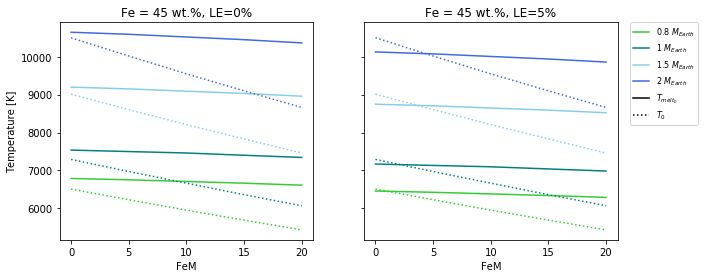

In [13]:
Fe_mantle = [0.,5,10,15,20]
label=["0.8 $M_{Earth}$",'1 $M_{Earth}$','1.5 $M_{Earth}$','2 $M_{Earth}$']
color=["limegreen","teal","skyblue","royalblue"]
fig, ax = plt.subplots(1, 2, figsize=[10,4],sharey=True)
for i in range(len(Masses)):
    ax[0].plot(Fe_mantle,TL0[:,i],color=color[i])
    ax[0].plot(Fe_mantle,T0[:,i],linestyle=':',color=color[i])
    ax[1].plot(Fe_mantle,TL0[:,i+len(Masses)],label=label[i],color=color[i])
    ax[1].plot(Fe_mantle,T0[:,i+len(Masses)],linestyle=':',color=color[i])
ax[0].set_xlabel('FeM')
ax[1].set_xlabel('FeM')
ax[0].set_ylabel('Temperature [K]')
ax[0].set_title('Fe = 45 wt.%, LE=0%')
ax[1].set_title('Fe = 45 wt.%, LE=5%')
handles, labels = ax[1].get_legend_handles_labels()
display = (0,1,2,3,4)
Tmelt0 = plt.Line2D((0,1),(0,0), color='k')
T0 = plt.Line2D((0,1),(0,0), color='k',marker='',linestyle=':')
ax[1].legend([handle for i,handle in enumerate(handles) if i in display]+[Tmelt0,T0],
          [label for i,label in enumerate(labels) if i in display]+['$T_{melt_{0}}$','$T_{0}$'],bbox_to_anchor=(1.05, 1),borderaxespad=0.,fontsize=8)
plt.savefig(plots_folder +"T0_Tmelt.pdf", bbox_inches="tight")
plt.show()

## Run cases for all XFe, all FeM, and a set amount of Mp (LE=0)

In [32]:
Masses_ = [0.8, 1.0, 1.5, 2.]
Fe = [15,20,25,30,35,40,45,50,55,60,65,70,75,80]
Fe_mantle_ = [0.,5.,10.,15.,20.]
S = 0.0

FE, FM = np.meshgrid(Fe,Fe_mantle_)
r_IC_end_M = np.zeros((len(Fe_mantle_),len(Masses_)*len(Fe)))
r_IC_beginning_M = np.zeros_like(r_IC_end_M)
MF_lifetime_M = np.zeros_like(r_IC_end_M)
Q_CMB_end_M = np.zeros_like(r_IC_end_M)
r_OC_M = np.zeros_like(r_IC_end_M)
S_M = np.zeros_like(r_IC_end_M)

for m,mass in enumerate(Masses_):
    for i, iron in enumerate(Fe):
        for j,iron_mantle in enumerate(Fe_mantle_):
            Mp = mass
            XFe = iron
            FeM = iron_mantle
            S = S
            print (Mp,XFe,FeM,S)
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)
            
            evo.run()
            #evo.plot(plots_folder)
            
            r_IC_beginning_M[j,i+m*len(Fe)] = evo.planet.r_IC_0/1e3 
            r_IC_end_M[j,i+m*len(Fe)] = evo.r_IC[-1]/1e3      
            r_OC_M[j,i+m*len(Fe)] = evo.planet.r_OC/1e3
            MF_lifetime_M[j,i+m*len(Fe)] = evo.t_mf           
            Q_CMB_end_M[j,i+m*len(Fe)] = evo.Q_CMB[-1] 
            S_M[j,i+m*len(Fe)] = evo.S_t[-1]

0.8 15 0.0 0.0
0.8 15 5.0 0.0
0.8 15 10.0 0.0
0.8 15 15.0 0.0
0.8 15 20.0 0.0
0.8 20 0.0 0.0
0.8 20 5.0 0.0
0.8 20 10.0 0.0
0.8 20 15.0 0.0
0.8 20 20.0 0.0
0.8 25 0.0 0.0
0.8 25 5.0 0.0
0.8 25 10.0 0.0
0.8 25 15.0 0.0
0.8 25 20.0 0.0
0.8 30 0.0 0.0
0.8 30 5.0 0.0
0.8 30 10.0 0.0
0.8 30 15.0 0.0
0.8 30 20.0 0.0
0.8 35 0.0 0.0
0.8 35 5.0 0.0
0.8 35 10.0 0.0
0.8 35 15.0 0.0
0.8 35 20.0 0.0
0.8 40 0.0 0.0
0.8 40 5.0 0.0
0.8 40 10.0 0.0
0.8 40 15.0 0.0
0.8 40 20.0 0.0
0.8 45 0.0 0.0
0.8 45 5.0 0.0
0.8 45 10.0 0.0
0.8 45 15.0 0.0
0.8 45 20.0 0.0
0.8 50 0.0 0.0
0.8 50 5.0 0.0
0.8 50 10.0 0.0
0.8 50 15.0 0.0
0.8 50 20.0 0.0
0.8 55 0.0 0.0
0.8 55 5.0 0.0
0.8 55 10.0 0.0
0.8 55 15.0 0.0
0.8 55 20.0 0.0
0.8 60 0.0 0.0
0.8 60 5.0 0.0
0.8 60 10.0 0.0
0.8 60 15.0 0.0
0.8 60 20.0 0.0
0.8 65 0.0 0.0
0.8 65 5.0 0.0
0.8 65 10.0 0.0
0.8 65 15.0 0.0
0.8 65 20.0 0.0
0.8 70 0.0 0.0
0.8 70 5.0 0.0
0.8 70 10.0 0.0
0.8 70 15.0 0.0
0.8 70 20.0 0.0
0.8 75 0.0 0.0
0.8 75 5.0 0.0
0.8 75 10.0 0.0
0.8 75 15.0 0.0
0.

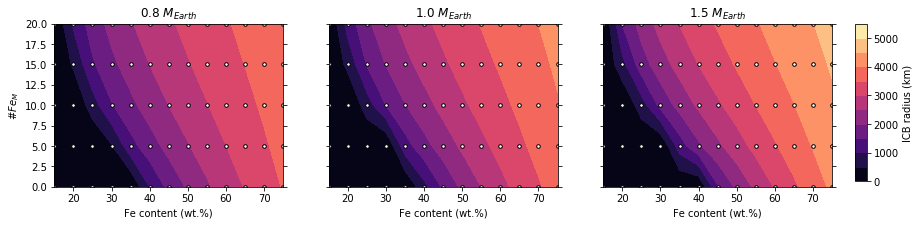

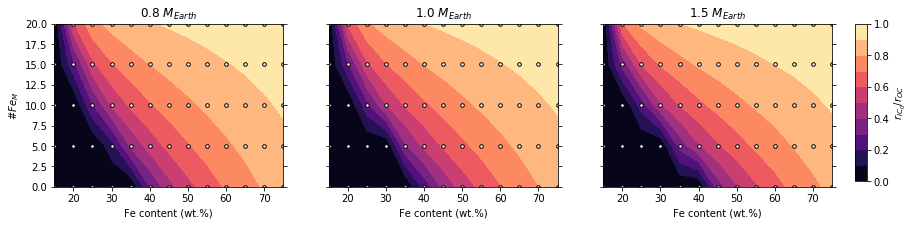

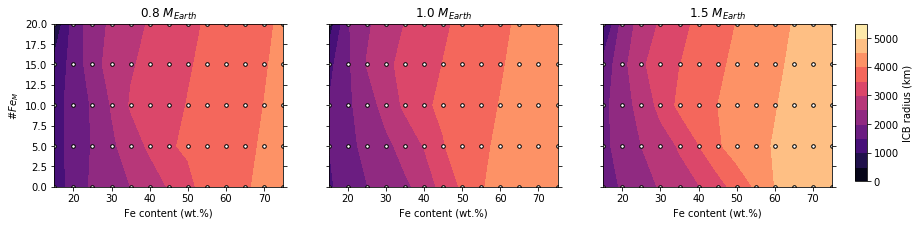

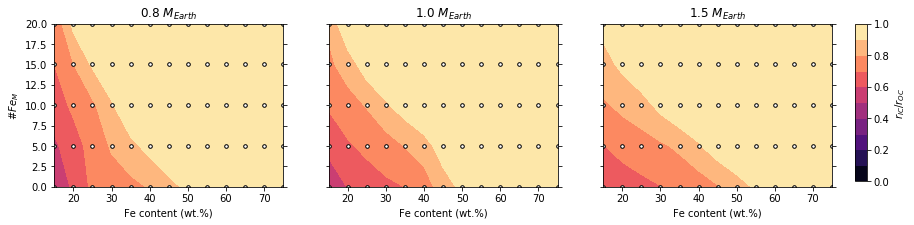

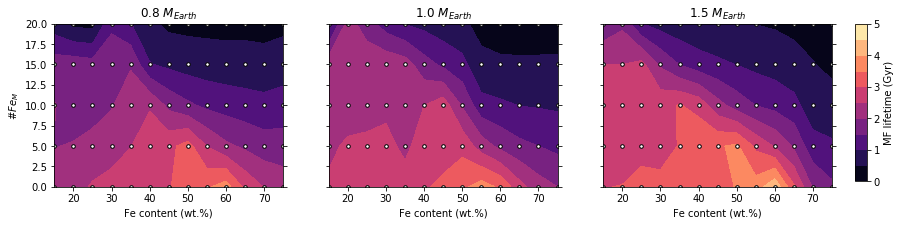

In [37]:
plot_contourfM(FE,FM,r_IC_beginning_M,Masses,Fe,Fe_mantle_,levels_rIC,plots_folder,Ylabel = "#$Fe_{M}$",clabel="ICB radius (km)",figname="r_IC0_Mp.pdf")
plot_contourfM(FE,FM,r_IC_beginning_M/r_OC_M,Masses,Fe,Fe_mantle_,levels_ICMF,plots_folder,clabel="$r_{IC_{0}}$/$r_{OC}$",figname="ICMF0_Mp.pdf")

plot_contourfM(FE,FM,r_IC_end_M,Masses,Fe,Fe_mantle_,levels_rIC,plots_folder,Ylabel = "#$Fe_{M}$",clabel="ICB radius (km)",figname="r_IC_Mp.pdf")
plot_contourfM(FE,FM,r_IC_end_M/r_OC_M,Masses,Fe,Fe_mantle_,levels_ICMF,plots_folder,clabel="$r_{IC}$/$r_{OC}$",figname="ICMF_Mp.pdf")

plot_contourfM(FE,FM,MF_lifetime_M,Masses,Fe,Fe_mantle_,levels_MF,plots_folder,Ylabel = "#$Fe_{M}$",clabel="MF lifetime (Gyr)",figname="MF_lifetime_Mp.pdf")

## Run cases for all Mp, all XFe, and a set amount of light elements (FeM=0)

In [5]:
Masses_S = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2.]
Fe_S = [15,20,25,30,35,40,45,50,55,60,65,70,75,80]
FeM_S = 0.0
LE_S = [0.,0.05,0.1]

M_S, F_S = np.meshgrid(Masses_S, Fe_S)
r_IC_end_S = np.zeros((len(Fe_S),len(Masses_S)*len(LE_S)))
r_IC_beginning_S = np.zeros_like(r_IC_end_S)
MF_lifetime_S = np.zeros_like(r_IC_end_S)
Q_CMB_end_S = np.zeros_like(r_IC_end_S)
r_OC_S = np.zeros_like(r_IC_end_S)
S_S = np.zeros_like(r_IC_end_S)

for m,light_elements in enumerate(LE_S):
    for i, mass in enumerate(Masses_S):
        for j,iron in enumerate(Fe_S):
            Mp = mass
            XFe = iron
            S = light_elements
            FeM = FeM_S
            print (Mp,XFe,FeM,S)
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)            
            evo.run()            
            r_IC_beginning_S[j,i+m*len(Masses_S)] = evo.planet.r_IC_0/1e3
            r_IC_end_S[j,i+m*len(Masses_S)] = evo.r_IC[-1]/1e3
            if r_IC_end_S[j,i+m*len(Masses_S)]<0:
                break
            r_OC_S[j,i+m*len(Masses_S)] = evo.planet.r_OC/1e3
            MF_lifetime_S[j,i+m*len(Masses_S)] = evo.t_mf           
            Q_CMB_end_S[j,i+m*len(Masses_S)] = evo.Q_CMB[-1]
            S_S[j,i+m*len(Masses_S)] = evo.S_t[-1]
            if S_S[j,i+m*len(Masses_S)] ==None or r_IC_end_S[j,i+m*len(Masses_S)] == None:
                S_S[j,i+m*len(Masses_S)] = 100.
                #r_IC_end_S[j,i+m*len(Masses_S)] = evo.planet.r_OC/1e3 

0.8 15 0.0 0.0
0.8 20 0.0 0.0
0.8 25 0.0 0.0
0.8 30 0.0 0.0
0.8 35 0.0 0.0
0.8 40 0.0 0.0
0.8 45 0.0 0.0
0.8 50 0.0 0.0
0.8 55 0.0 0.0
0.8 60 0.0 0.0
0.8 65 0.0 0.0
0.8 70 0.0 0.0
0.8 75 0.0 0.0
0.8 80 0.0 0.0
0.9 15 0.0 0.0
0.9 20 0.0 0.0
0.9 25 0.0 0.0
0.9 30 0.0 0.0
0.9 35 0.0 0.0
0.9 40 0.0 0.0
0.9 45 0.0 0.0
0.9 50 0.0 0.0
0.9 55 0.0 0.0
0.9 60 0.0 0.0
0.9 65 0.0 0.0
0.9 70 0.0 0.0
0.9 75 0.0 0.0
0.9 80 0.0 0.0
1.0 15 0.0 0.0
1.0 20 0.0 0.0
1.0 25 0.0 0.0
1.0 30 0.0 0.0
1.0 35 0.0 0.0
1.0 40 0.0 0.0
1.0 45 0.0 0.0
1.0 50 0.0 0.0
1.0 55 0.0 0.0
1.0 60 0.0 0.0
1.0 65 0.0 0.0
1.0 70 0.0 0.0
1.0 75 0.0 0.0
1.0 80 0.0 0.0
1.1 15 0.0 0.0
1.1 20 0.0 0.0
1.1 25 0.0 0.0
1.1 30 0.0 0.0
1.1 35 0.0 0.0
1.1 40 0.0 0.0
1.1 45 0.0 0.0
1.1 50 0.0 0.0
1.1 55 0.0 0.0
1.1 60 0.0 0.0
1.1 65 0.0 0.0
1.1 70 0.0 0.0
1.1 75 0.0 0.0
1.1 80 0.0 0.0
1.2 15 0.0 0.0
1.2 20 0.0 0.0
1.2 25 0.0 0.0
1.2 30 0.0 0.0
1.2 35 0.0 0.0
1.2 40 0.0 0.0
1.2 45 0.0 0.0
1.2 50 0.0 0.0
1.2 55 0.0 0.0
1.2 60 0.0 0.0
1.2 65 0.0

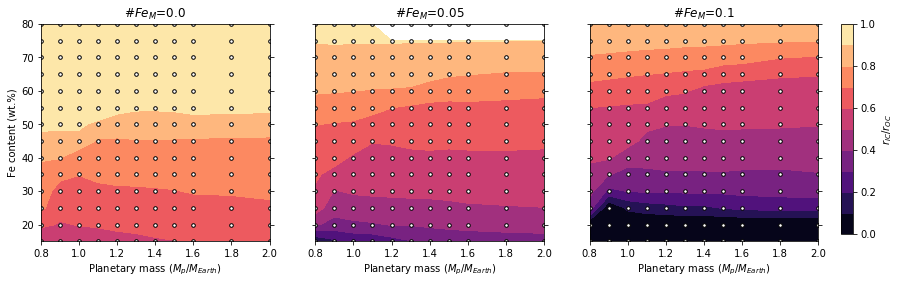

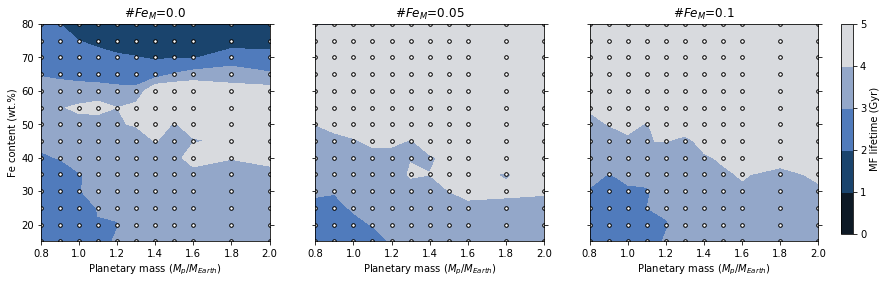

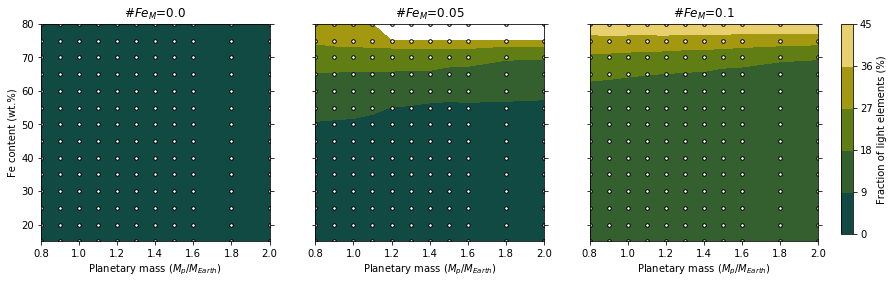

In [8]:
# plot_contourf(M_S,F_S,r_IC_beginning_S,Masses_S,Fe_S,LE_S,levels_rIC,plots_folder,clabel="ICB radius (km)",figname="r_IC0_S.pdf")
# plot_contourf(M_S,F_S,r_IC_beginning_S/r_OC_S,Masses_S,Fe_S,LE_S,levels_ICMF,plots_folder,clabel="$r_{IC_{0}}$/$r_{OC}$",figname="ICMF0_S.pdf")

#plot_contourf(M_S,F_S,r_IC_end_S,Masses_S,Fe_S,LE_S,levels_rIC,plots_folder,clabel="ICB radius (km)",figname="r_IC_S.pdf")
plot_contourf(M_S,F_S,r_IC_end_S/r_OC_S,Masses_S,Fe_S,LE_S,levels_ICMF,plots_folder,clabel="$r_{IC}$/$r_{OC}$",figname="ICMF_Sprova.pdf")

plot_contourf(M_S,F_S,MF_lifetime_S,Masses_S,Fe_S,LE_S,levels_MF,plots_folder,colormap=oslo,clabel="MF lifetime (Gyr)",figname="MF_lifetime_Sprova.pdf")
plot_contourf(M_S,F_S,S_S*1e2,Masses_S,Fe_S,LE_S,levels_S,plots_folder,colormap=bamako,clabel="Fraction of light elements (%)",figname="S_Sprova.pdf")


## Run cases for all XFe, all LE, and a set amount of masses (FeM=0)

In [42]:
Masses_SM = [0.8, 1.0, 1.5, 2.]
Fe_SM = [15,20,25,30,35,40,45,50,55,60,65,70,75,80]
Fe_mantle_SM = 0.
LE_SM = [0.0,0.02,0.04,0.06,0.08,0.1]

F_SM, M_SM = np.meshgrid(Fe_SM,LE_SM)
r_IC_end_SM = np.zeros((len(LE_SM),len(Masses_SM)*len(Fe_SM)))
r_IC_beginning_SM = np.zeros_like(r_IC_end_SM)
MF_lifetime_SM = np.zeros_like(r_IC_end_SM)
Q_CMB_end_SM = np.zeros_like(r_IC_end_SM)
r_OC_SM = np.zeros_like(r_IC_end_SM)

for m,mass in enumerate(Masses_SM):
    for i, iron in enumerate(Fe_SM):
        for j,light_elements in enumerate(LE_SM):
            Mp = mass
            XFe = iron
            FeM = Fe_mantle_SM
            S = light_elements
            print (Mp,XFe,FeM,S)
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)
            
            evo.run()
            #evo.plot(plots_folder)
            
            r_IC_beginning_SM[j,i+m*len(Fe_SM)] = evo.planet.r_IC_0/1e3 
            r_IC_end_SM[j,i+m*len(Fe_SM)] = evo.r_IC[-1]/1e3
            r_OC_SM[j,i+m*len(Fe_SM)] = evo.planet.r_OC/1e3
            if np.isnan(r_IC_end_SM[j,i+m*len(Fe_SM)]):# == None:
                r_IC_end_SM[j,i+m*len(Fe_SM)] = r_OC_SM[j,i+m*len(Fe_SM)]
            MF_lifetime_SM[j,i+m*len(Fe_SM)] = evo.t_mf           
            Q_CMB_end_SM[j,i+m*len(Fe_SM)] = evo.Q_CMB[-1]

0.8 15 0.0 0.0
5506.515768223017 5506.662639811341
0.8 15 0.0 0.02
5397.202905234211 5397.5035317187885
0.8 15 0.0 0.04
5290.69128494186 5290.747922294989
0.8 15 0.0 0.06
0.8 15 0.0 0.08
0.8 15 0.0 0.1
0.8 20 0.0 0.0
5784.697783067093 5784.9199213056045
0.8 20 0.0 0.02
5659.124508450277 5667.497996414274
0.8 20 0.0 0.04
5555.8207208332105 5557.308888165592
0.8 20 0.0 0.06
5447.762981655353 5447.888156331252
0.8 20 0.0 0.08
5338.682261864463 5339.370918801088
0.8 20 0.0 0.1
0.8 25 0.0 0.0
6012.574714139086 6023.854448538528
0.8 25 0.0 0.02
5907.611593590807 5907.87434458477
0.8 25 0.0 0.04
5783.073093633573 5788.737488758704
0.8 25 0.0 0.06
5666.170877861414 5673.494710575796
0.8 25 0.0 0.08
5562.615345184377 5563.155995518811
0.8 25 0.0 0.1
5452.219390141223 5452.6171184157965
0.8 30 0.0 0.0
6246.191971011742 6251.686570291542
0.8 30 0.0 0.02
6121.142044699915 6127.58811498088
0.8 30 0.0 0.04
5997.444520947101 6005.7112411563685
0.8 30 0.0 0.06
5879.8777070353535 5886.872760448908
0.8 

1.5 80 0.0 0.08
1.5 80 0.0 0.1
2.0 15 0.0 0.0
8543.854583134635 8544.136719909096
2.0 15 0.0 0.02
8374.161825465493 8374.778307256762
2.0 15 0.0 0.04
8202.924070875868 8207.574233020037
2.0 15 0.0 0.06
8045.386710679075 8046.067649176124
2.0 15 0.0 0.08
2.0 15 0.0 0.1
2.0 20 0.0 0.0
8973.805512549834 8988.964243602373
2.0 20 0.0 0.02
8812.654966431672 8813.7792185134
2.0 20 0.0 0.04
8628.679361743263 8637.296188708055
2.0 20 0.0 0.06
8464.725830418409 8467.349188712818
2.0 20 0.0 0.08
8296.44442341184 8299.197563225785
2.0 20 0.0 0.1
2.0 25 0.0 0.0
9393.072739161926 9396.670676246822
2.0 25 0.0 0.02
9182.681454654936 9207.324106739496
2.0 25 0.0 0.04
9026.190628570046 9028.438616431748
2.0 25 0.0 0.06
8846.22301201113 8849.195792946659
2.0 25 0.0 0.08
8669.351241374836 8673.252199021035
2.0 25 0.0 0.1
8499.104855121714 8501.253225580924
2.0 30 0.0 0.0
9733.733879017927 9757.889426151192
2.0 30 0.0 0.02
9543.938255965977 9564.91794918279
2.0 30 0.0 0.04
9332.860316796678 9373.4411622354

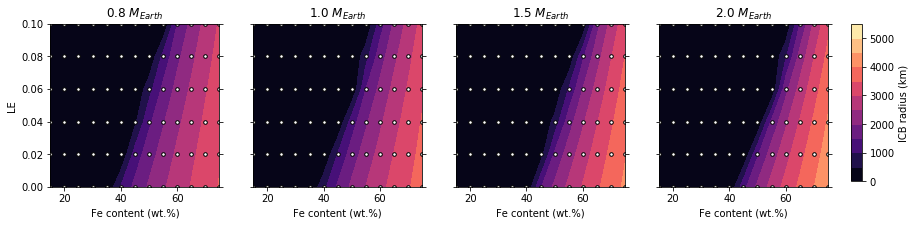

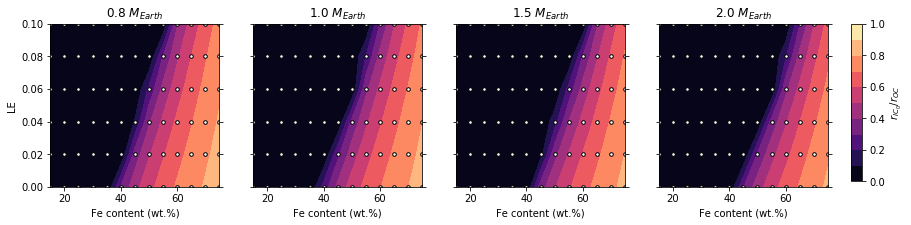

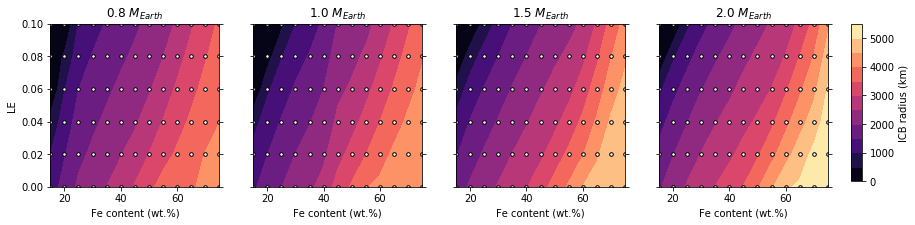

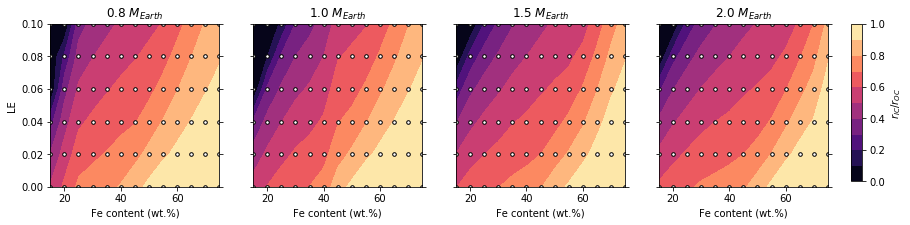

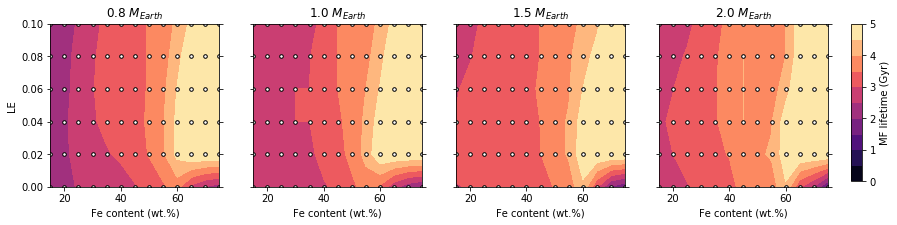

In [48]:
plot_contourfM(F_SM,M_SM,r_IC_beginning_SM,Masses_SM,Fe_SM,LE_SM,levels_rIC,plots_folder,Ylabel = "LE",clabel="ICB radius (km)",figname="r_IC0_MpS.pdf")
plot_contourfM(F_SM,M_SM,r_IC_beginning_SM/r_OC_SM,Masses_SM,Fe_SM,LE_SM,levels_ICMF,plots_folder,Ylabel = "LE",clabel="$r_{IC_{0}}$/$r_{OC}$",figname="ICMF0_MpS.pdf")

plot_contourfM(F_SM,M_SM,r_IC_end_SM,Masses_SM,Fe_SM,LE_SM,levels_rIC,plots_folder,Ylabel = "LE",clabel="ICB radius (km)",figname="r_IC_MpSTEST.pdf")
plot_contourfM(F_SM,M_SM,r_IC_end_SM/r_OC_SM,Masses_SM,Fe_SM,LE_SM,levels_ICMF,plots_folder,Ylabel = "LE",clabel="$r_{IC}$/$r_{OC}$",figname="ICMF_MpS.pdf")

levels_MF = np.linspace(0, 5, 11)
plot_contourfM(F_SM,M_SM,MF_lifetime_SM,Masses_SM,Fe_SM,LE_SM,levels_MF,plots_folder,Ylabel = "LE",clabel="MF lifetime (Gyr)",figname="MF_lifetime_MpS.pdf")

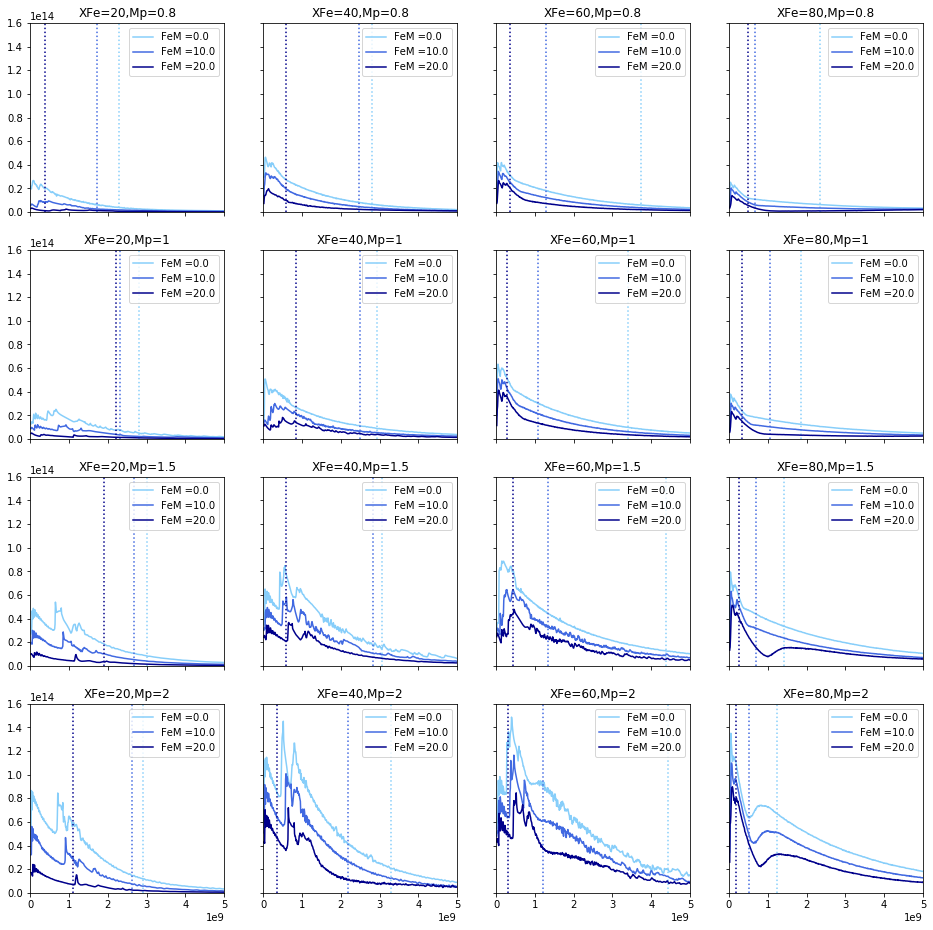

In [20]:
Mp = [0.8,1,1.5,2]
XFe = [20,40,60,80]
FeM = [0.,10.,20.]

qcmb = np.zeros((499,len(FeM)),dtype=np.float64)
r_OC = np.zeros((len(FeM),1),dtype=np.float64)
MF = np.zeros_like(r_OC)
colors = ["lightskyblue","royalblue","darkblue"]
fig, ax = plt.subplots(len(Mp), len(XFe), figsize=[16,16],sharey=True,sharex=True)
for i in range(len(Mp)):
    for j in range(len(XFe)):
        for k in range(len(FeM)):
            qcmb_ev = pd.read_csv("./Q_CMB/res_t_HS_Tm_Tb_qs_qc_M{:02d}_Fe{:02d}_#FeM{:02d}.res".format(int(10*Mp[i]),int(XFe[j]),int(FeM[k])), skipinitialspace=True, sep=" ", index_col=False,skiprows=[0])
            qcmb_ev.columns = ["time", "H_rad", "T_um","T_cmb","q_surf","qcmb"]
            time_vector = qcmb_ev["time"] *1e6
            qcmb[:,k] = qcmb_ev["qcmb"]
            
            Planet = evolution.Rocky_Planet(Mp[i],XFe[j],FeM[k],0.)
            evo = evolution.Evolution(Planet)
            evo.run()
            r_OC[k] = evo.planet.r_OC
            MF[k] = evo.t_mf
            
            labels = "FeM ={}".format(FeM[k])
            ax[i,j].axvline(MF[k]*1e9, ymin=0, ymax=1.6e14,color=colors[k],linestyle=':')
            ax[i,j].plot(time_vector,qcmb[:,k]*r_OC[k]**2 * 4 * np.pi,color=colors[k],label=labels)
            ax[i,j].set_title('XFe={},Mp={}'.format(XFe[j],Mp[i]))
            ax[i,j].legend(loc='upper right')
            ax[i,j].set_ylim(bottom=0,top=1.6e14)
plt.xlim([0,5e9])
plt.show()

- The higher the planetary mass, the higher the obtained Q_CMB.
- The lower FeM (i.e, the smaller the initial/final inner core), the higher Q_CMB. Why is that?
- The higher XFe (i.e., the larger the initial/final inner core), the higher Q_CMB (unless XFe becomes very high).
- CMB curves for high XFe look "smoother", with less perturbations, BUT with a later overturn arising from instabilities, such as an unstable density stratifications.
- Initial large overturn occurs later for high FeM (large initial inner core) and low XFe (small initial inner core).
- There is not a huge dependency on the planetary mass, although the timing of the overturn is delayed for large masses.
- In terms of the relation between magnetic field lifetime and the overturn timing, we see that the earlier the overturn takes place (and thus, the lower FeM) during the planet's evolution, the longer the magnetic field lifetime ends up being. This is also seen for changing XFe, but...
- There is a "sweet spot" in terms of planetary XFe. If it gets too high (i.e., XFe=80) the magnetic field shuts off earlier, because the initial inner core is already too large. 
- When FeM higher, MF strength is lower.

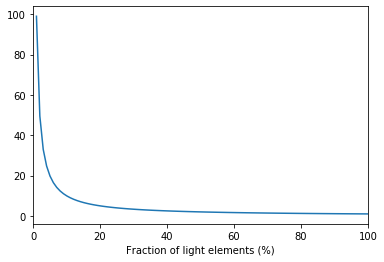

In [26]:
X = np.linspace(0,1,100)

def TX(X):
    return 1./(1.-(1.-X))

T_X = TX(X)

plt.plot(X*100,T_X)
plt.xlabel("Fraction of light elements (%)")
plt.xlim([0,100])
plt.show()

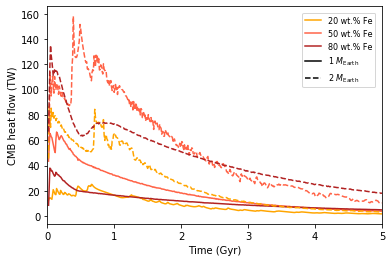

In [40]:
Mp = [1,2]
XFe = [20,50,80]
FeM = 0.

qcmb = np.zeros((499,len(XFe)*len(Mp)),dtype=np.float64)
r_OC = np.zeros((1,1),dtype=np.float64)
MF = np.zeros_like(r_OC)
colors = ["lightskyblue","royalblue","darkblue"]
for i in range(len(Mp)):
    for j in range(len(XFe)):
        qcmb_ev = pd.read_csv("./Q_CMB/res_t_HS_Tm_Tb_qs_qc_M{:02d}_Fe{:02d}_#FeM{:02d}.res".format(int(10*Mp[i]),int(XFe[j]),int(FeM)), skipinitialspace=True, sep=" ", index_col=False,skiprows=[0])
        qcmb_ev.columns = ["time", "H_rad", "T_um","T_cmb","q_surf","qcmb"]
        time_vector = qcmb_ev["time"] *1e6
        qcmb[:,i+j*len(Mp)] = qcmb_ev["qcmb"]
        labels= ['20 wt.% Fe','50 wt.% Fe','80 wt.% Fe']
        Planet = evolution.Rocky_Planet(Mp[i],XFe[j],FeM,0.)
        evo = evolution.Evolution(Planet)
        evo.run()
        r_OC = evo.planet.r_OC
        
        colors = ['orange','tomato','firebrick']
        ls =['-','--']
        ax = plt.gca()
        if i==0:
            ax.plot(time_vector/1e9,(qcmb[:,i+j*len(Mp)]*r_OC**2 * 4 * np.pi)/1e12,color=colors[j],linestyle=ls[i],label=labels[j])
        else:
            ax.plot(time_vector/1e9,(qcmb[:,i+j*len(Mp)]*r_OC**2 * 4 * np.pi)/1e12,color=colors[j],linestyle=ls[i])
        ax.set_xlabel('Time (Gyr)')
        ax.set_ylabel('CMB heat flow (TW)')
        ax.set_xlim(left=0,right=5)
        handles, labels = ax.get_legend_handles_labels()
        display = (0,1,2,3,4)
        M1 = plt.Line2D((0,1),(0,0), color='k')
        M2 = plt.Line2D((0,1),(0,0), color='k',marker='',linestyle='--')
        ax.legend([handle for i,handle in enumerate(handles) if i in display]+[M1,M2],
          [label for i,label in enumerate(labels) if i in display]+['1 $M_{\mathrm{Earth}}$','2 $M_{\mathrm{Earth}}$'],bbox_to_anchor=(0.98, 0.97),borderaxespad=0.,fontsize=8)
plt.savefig('Q_CMB.pdf')
plt.show()